<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/TPU_May_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/files')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from collections import Counter
import itertools



In [3]:
# Pandas setting to display more dataset

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns',600)
pd.set_option('display.max_colwidth', None)

In [4]:
#Check data
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

In [5]:
print(df_train.shape, df_test.shape)

(900000, 32) (700000, 31)


In [6]:
df_train.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,3,3,3,1,6,1,0,7,4,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,0,2,3,0,1,0,4,6,0,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,6,6,4,3,1,2,2,1,4,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,0,1,6,4,2,3,3,0,3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,4,3,0,6,0,3,3,1,0,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [7]:
df_train.info()

# dtype은 float, object 그리고 int이다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900000 entries, 0 to 899999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_00    900000 non-null  float64
 1   f_01    900000 non-null  float64
 2   f_02    900000 non-null  float64
 3   f_03    900000 non-null  float64
 4   f_04    900000 non-null  float64
 5   f_05    900000 non-null  float64
 6   f_06    900000 non-null  float64
 7   f_07    900000 non-null  int64  
 8   f_08    900000 non-null  int64  
 9   f_09    900000 non-null  int64  
 10  f_10    900000 non-null  int64  
 11  f_11    900000 non-null  int64  
 12  f_12    900000 non-null  int64  
 13  f_13    900000 non-null  int64  
 14  f_14    900000 non-null  int64  
 15  f_15    900000 non-null  int64  
 16  f_16    900000 non-null  int64  
 17  f_17    900000 non-null  int64  
 18  f_18    900000 non-null  int64  
 19  f_19    900000 non-null  float64
 20  f_20    900000 non-null  float64
 21  f_21    90

In [8]:
#EDA
colors=["lightcoral", "sandybrown", "darkorange", "mediumseagreen", "lightseagreen",
          "cornflowerblue", "mediumpurple", "palevioletred", "lightskyblue", "sandybrown",
          "yellowgreen", "indianred", "lightsteelblue", "mediumorchid", "deepskyblue"]


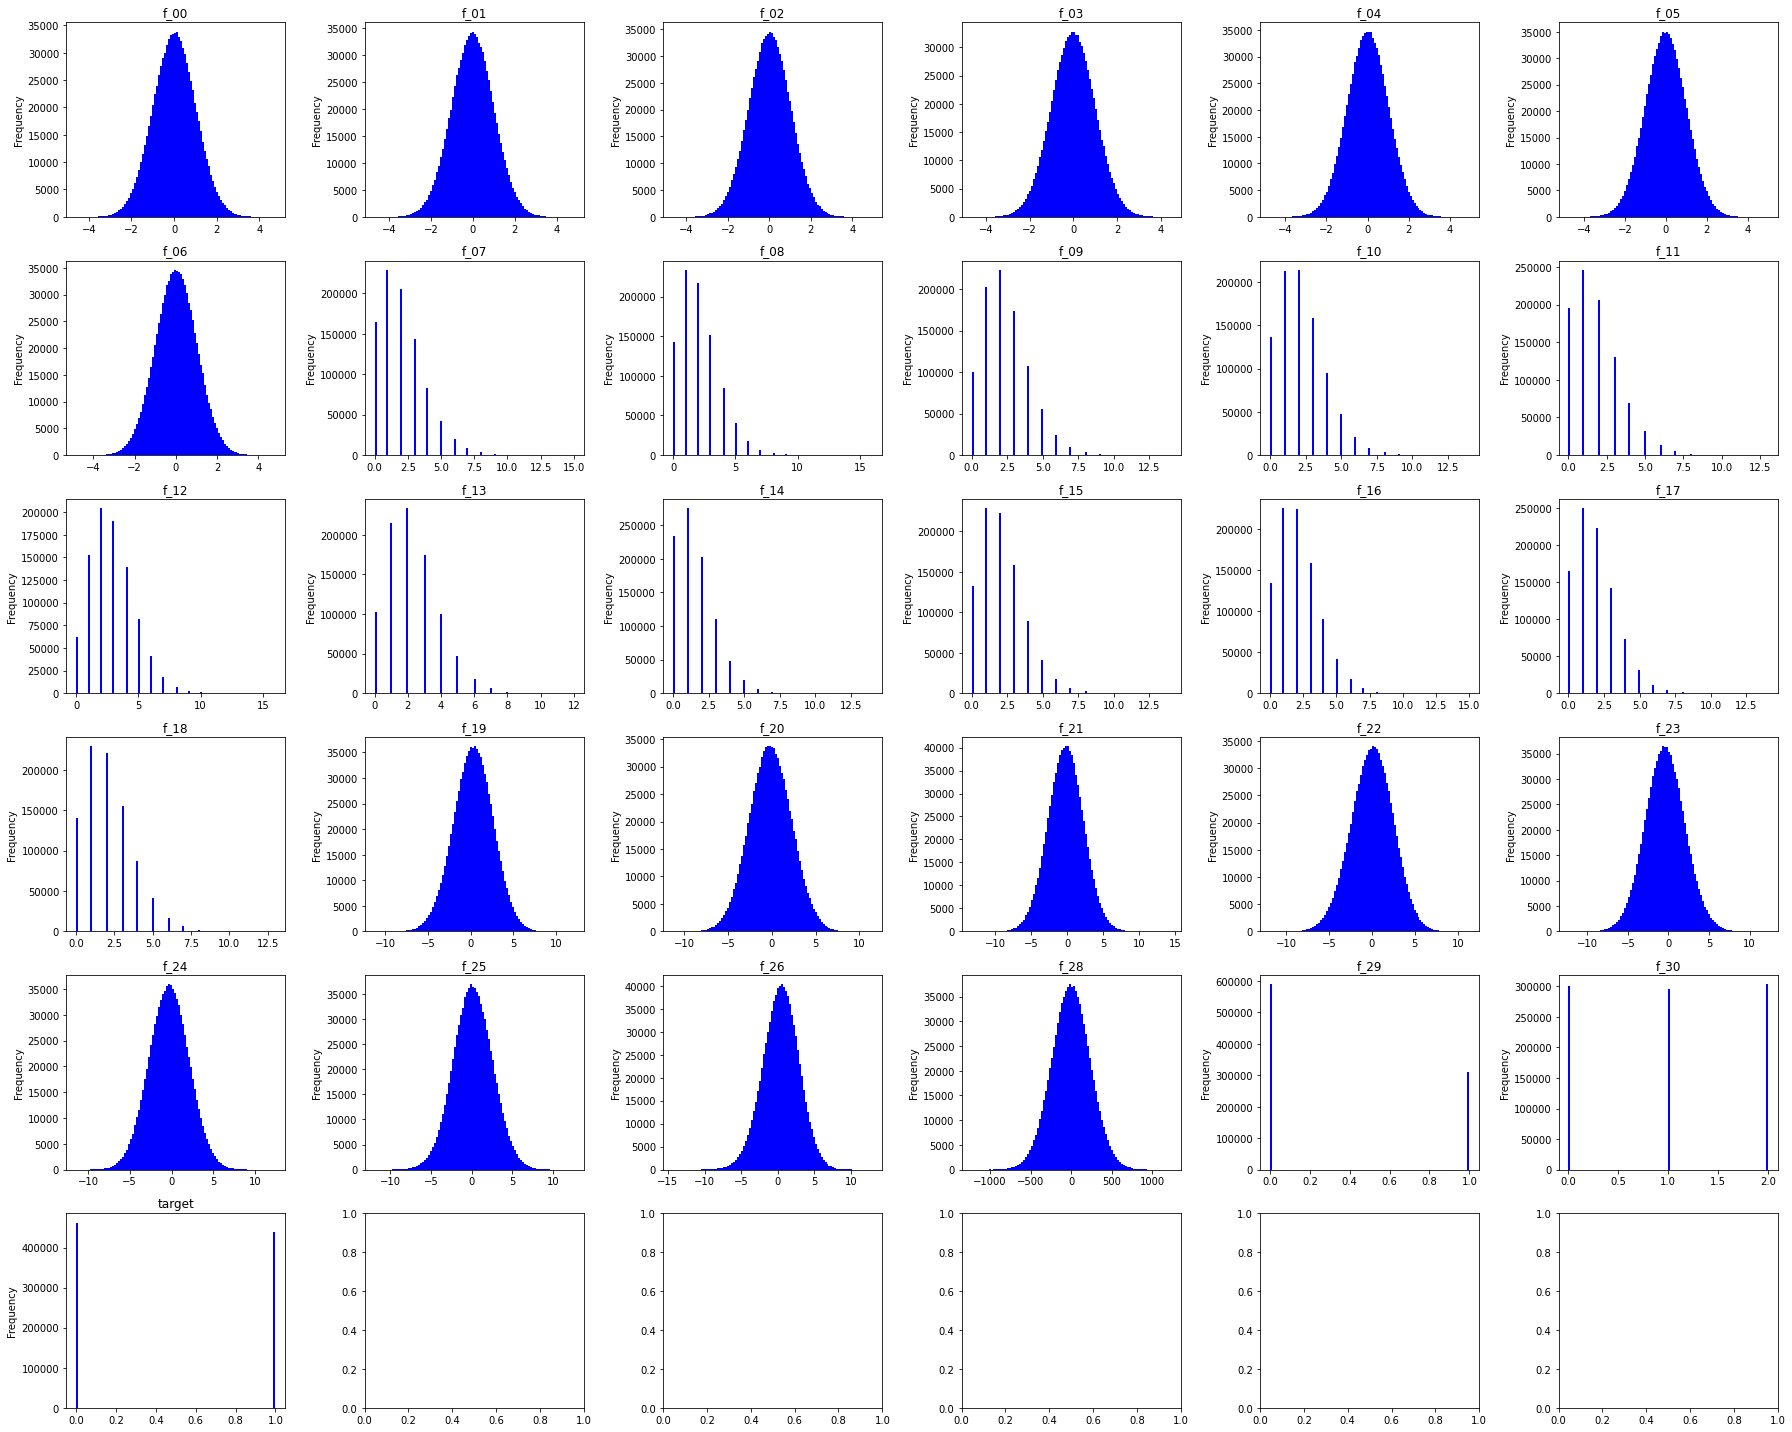

In [9]:
# figure = plt.figure(figsize=(16,8))
features = [f for f in df_train.columns if df_train[f].dtype != 'object']

fig, ax = plt.subplots(6,6, figsize=(25,20))
ax=ax.ravel()

for i, col in enumerate(features):
  df_train[col].plot(ax=ax[i], kind='hist', bins=100, color='b')
  ax[i].set_title(f'{col}')

plt.tight_layout()
plt.show()







# figure = plt.figure(figsize=(16, 8))
# for feat in range(31):
#     feat_name = f'f_{feat:02d}'
#     if(feat_name != 'f_27'): # f_27を除く
#         plt.subplot(8, 4, feat+1)
#         plt.hist(df_train[feat_name], bins=100)
#         plt.title(f'{feat_name}')
# figure.tight_layout(h_pad=1.0, w_pad=0.8)
# plt.show()


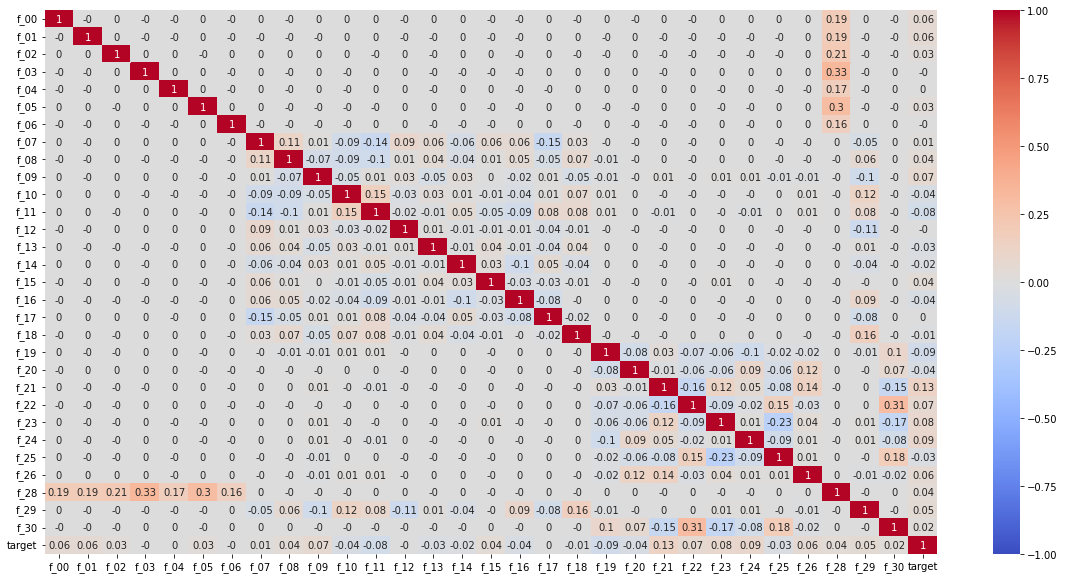

In [10]:
#corr
corr=df_train.corr().round(2)
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmax=1, vmin=-1,center=0, annot=True,cmap='coolwarm')
plt.show()



In [11]:
#Concat train & test

all = pd.concat([df_train, df_test], ignore_index=True)
all.head()






,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,3,3,3,1,6,1,0,7,4,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0.0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,0,2,3,0,1,0,4,6,0,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1.0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,6,6,4,3,1,2,2,1,4,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1.0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,0,1,6,4,2,3,3,0,3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1.0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,4,3,0,6,0,3,3,1,0,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1.0


In [12]:
import plotly.express as px
all.drop(columns=['target']).describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='Greens')\
        .background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
f_00,1600000.000000,-0.000199,0.999490,-4.658018,-0.675592,0.000437,0.674935,5.761950
f_01,1600000.000000,0.000335,0.998291,-4.922718,-0.674721,0.000905,0.673461,4.815699
f_02,1600000.000000,0.000492,1.000428,-4.642676,-0.675056,0.000971,0.675678,4.961982
f_03,1600000.000000,-0.000461,1.000868,-4.658816,-0.675469,-0.001410,0.674252,4.899904
f_04,1600000.000000,0.000029,0.999695,-4.748501,-0.675402,-0.000830,0.674142,4.948983
f_05,1600000.000000,-0.000045,1.000038,-5.141356,-0.673939,-0.000936,0.674632,4.971881
f_06,1600000.000000,0.000716,0.999765,-4.842919,-0.673268,0.000213,0.675541,4.822668
f_07,1600000.000000,2.031179,1.656057,0.000000,1.000000,2.000000,3.000000,16.000000
f_08,1600000.000000,2.057527,1.591292,0.000000,1.000000,2.000000,3.000000,16.000000
f_09,1600000.000000,2.361889,1.637264,0.000000,1.000000,2.000000,3.000000,16.000000


In [13]:
#Preprocessing
# Label encoding F_27

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df_train['f_27']
# 전부 10자인거 같은데 확인해보자

df_train['f_27'].apply(lambda x: len(x)).unique() #10개 확인..이리 쉬웠구나.

tmp_all = all
for i in range(10):
    temp = []
    for j in range(len(all)):
        temp.append(all['f_27'][j][i])
    tmp_all['f_27_' + str(i + 1)] = temp
tmp_all




,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target,f_27_1,f_27_2,f_27_3,f_27_4,f_27_5,f_27_6,f_27_7,f_27_8,f_27_9,f_27_10
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,3,3,3,1,6,1,0,7,4,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0.0,A,B,A,B,D,A,D,B,A,B
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,0,2,3,0,1,0,4,6,0,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1.0,A,C,A,C,C,A,D,C,E,B
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,6,6,4,3,1,2,2,1,4,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1.0,A,A,A,E,A,B,C,K,A,D
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,0,1,6,4,2,3,3,0,3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1.0,B,D,B,B,A,A,C,B,C,B
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,4,3,0,6,0,3,3,1,0,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1.0,B,D,B,C,B,B,C,H,F,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,6,2,5,3,4,2,2,3,0,2,0.765192,-2.185190,2.604048,1.122867,0.518110,1.243837,0.575111,0.076372,BCBCEBHMCD,204.186539,0,0,NaN,B,C,B,C,E,B,H,M,C,D
1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,4,2,0,2,3,2,2,3,3,0,-0.895073,-0.239552,3.029857,1.384682,-1.135740,2.982713,-1.511760,2.225218,BAABCADQFC,-97.694591,0,2,NaN,B,A,A,B,C,A,D,Q,F,C
1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,2,1,1,3,1,0,1,3,2,1,0.178079,-0.922626,4.021273,-1.845266,1.096011,-2.734508,-4.885955,-2.248739,AAAJCBGQBA,130.622745,1,0,NaN,A,A,A,J,C,B,G,Q,B,A
1599998,-2.031073,-1.238398,0.964699,-1.045950,0.906064,0.634301,-0.707474,5,1,1,3,0,2,4,2,4,6,0,0,4.043097,-3.079996,1.453864,-1.696606,1.018995,1.973697,-0.353068,-3.333449,BCBBCABNDE,-364.625148,0,0,NaN,B,C,B,B,C,A,B,N,D,E


In [19]:
import string
alphabet_upper = list(string.ascii_uppercase)

char_counts = []
for character in alphabet_upper:
  char_counts.append(all['f_27'].str.count(character).sum())

char_counts_df = pd.DataFrame({'Character': alphabet_upper, 'Chracter Count': char_counts})

char_counts_df

,Character,Chracter Count
0,A,3939436
1,B,5189250
2,C,2365357
3,D,1646327
4,E,956500
5,F,504957
6,G,262142
7,H,150926
8,I,105556
9,J,89375


In [23]:
# def letter_counter(a):
#   count = Counter({})
#   for row in a['f_27']:
#     count += Counter(row)
#   return count

from collections import Counter
all['f_27'].apply(lambda x: Counter(x)).sum() # 와 성공했다 ㅋㅋㅋㅋㅋㅋ

Counter({'A': 3939436,
         'B': 5189250,
         'C': 2365357,
         'D': 1646327,
         'E': 956500,
         'F': 504957,
         'G': 262142,
         'H': 150926,
         'I': 105556,
         'J': 89375,
         'K': 83621,
         'L': 81943,
         'M': 81663,
         'N': 81306,
         'O': 80926,
         'P': 80680,
         'Q': 78952,
         'R': 77088,
         'S': 74399,
         'T': 69596})

In [ ]:
#Label Encoding

